<a href="https://colab.research.google.com/github/uday-routhu/models/blob/master/Project_2_Part_1_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 1 (Core):

* Author: Udayakumar Routhu

###First choice: dataset 1


1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person? A business? An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import missingno as msno
## Setting the max_columns to 50
pd.set_option('display.max_columns',50)

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
set_config(transform_output='pandas')

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # '

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Define EDA Functions

###explore_categorical


In [3]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

In [4]:
def plot_categorical_vs_target(df, x, y,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # # Save null values before imputing
  # null_count = temp_df[x].isna().sum()
  # null_perc = null_count/len(df)* 100

  ## fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])


  ## Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
    # show fig and print
  plt.show()
  # print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

###explore_numeric

In [5]:
# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)

  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, axes

In [6]:
def plot_numeric_vs_target(df, x, y,figsize=(6,4),):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  if null_count > 0:
    null_perc = null_count/len(df)* 100
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

### Load in the dataset

In [7]:
# Load the data set
fpath_adult = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/adult.csv"
df_adult = pd.read_csv(fpath_adult)

In [8]:
df_adult.info()
df_adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Source of data
  The data can be downloaded from [this link](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

###Brief description of data
- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

###What is the target?
- Income

###What does one row represent? (A person? A business? An event? A product?)
- A person

###Is this a classification or regression problem?
 - Since the goal is to predict whether an individual's income is above or below a threshold (categorical outcome), this is a classification problem.

###How many features does the data have?  
 - Number of attributes: 14
 - These are the demographics and other features to describe a person

###How many rows are in the dataset?
- Number of rows: 48842

###What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 - we clean and explore the data before running the models

###CLean and Prepare The Data

###Identified and addressed missing values.

In [9]:
df_adult.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

* There are no null values to impute place holder

###Deleted duplicate rows.

In [10]:
#Explore Data
df_adult.duplicated().sum()

52

* There are 52 duplicated records in dataset

In [11]:
# drop duplicated record
df_adult = df_adult.drop_duplicates()

In [12]:
#again check duplicates dropped or not
df_adult.duplicated().sum()

0

* now, there are no duplicated rows

###Check for impossible numeric values/Delete unnecessary columns.

In [13]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


* there is no data type missing

###Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [14]:
data_types = df_adult.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_adult[col].value_counts(dropna=False))
    print("\n\n")
    print(df_adult[col])

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48790, dtype: object
- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



0                11th
1           

* There is specail char '?' availble in 'relationship','workclass' column so removing that value

In [15]:
values_to_remove = ['?']
# Remove rows containing specified values in the 'year' column
df_adult = df_adult[~df_adult['relationship'].isin(values_to_remove)]
df_adult = df_adult[~df_adult['workclass'].isin(values_to_remove)]

In [16]:
data_types = df_adult.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_adult[col].value_counts(dropna=False))
    print("\n\n")
    print(df_adult[col])

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45995, dtype: object
- education:
HS-grad         14960
Some-college    10026
Bachelors        7761
Masters          2589
Assoc-voc        1977
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           844
Prof-school       810
9th               687
12th              597
Doctorate         576
5th-6th           466
1st-4th           227
Preschool          71
Name: education, dtype: int64



0                11th
1             HS-grad
2          Assoc

* Now , there are no inconsistency columns

###Check for and address any impossible values in numeric columns.

In [17]:
stats =  df_adult.describe()
stats.loc[['mean','min','max']]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
mean,38.560822,1.898157e+05,10.129231,1115.253288,88.802652,40.950234
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#####Outliers

* There are no impossible numeric values
* no extreme outliers are noted

In [77]:
df_adult.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45995,45995,45995,45995,45995,45995,45995,45995,45995
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,14960,21439,6165,18992,39407,31088,41266,34579


###Explore the data

#### Define EDA Functions

#####workclass

In [18]:
# Confirming the dtype to select correct EDA function
feature = "workclass"
df_adult[feature].dtype

dtype('O')

In [19]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45995 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45995 non-null  int64 
 1   workclass        45995 non-null  object
 2   fnlwgt           45995 non-null  int64 
 3   education        45995 non-null  object
 4   educational-num  45995 non-null  int64 
 5   marital-status   45995 non-null  object
 6   occupation       45995 non-null  object
 7   relationship     45995 non-null  object
 8   race             45995 non-null  object
 9   gender           45995 non-null  object
 10  capital-gain     45995 non-null  int64 
 11  capital-loss     45995 non-null  int64 
 12  hours-per-week   45995 non-null  int64 
 13  native-country   45995 non-null  object
 14  income           45995 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


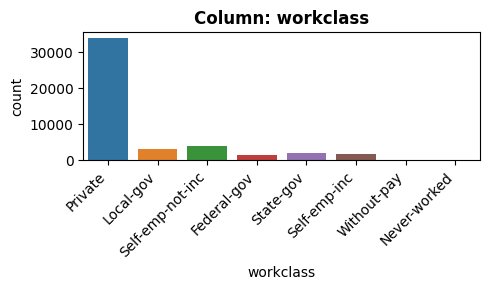

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'Private' occurs 33860 times (73.62%)


In [20]:
# Testing function
fig, ax = explore_categorical(df_adult, "workclass", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 73.62% of the feature.

4. What is the cardinality? Is it high?
  - There are 8 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


####education

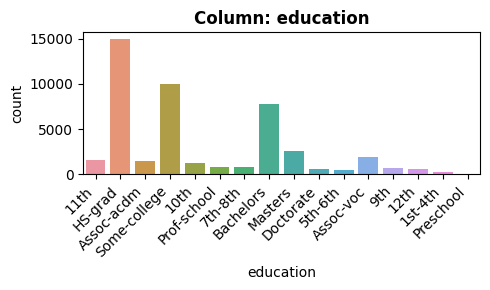

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 14960 times (32.53%)


In [21]:
# Testing function
fig, ax = explore_categorical(df_adult, "education", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 32.53% of the feature.

4. What is the cardinality? Is it high?
  - There are 16 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####marital-status

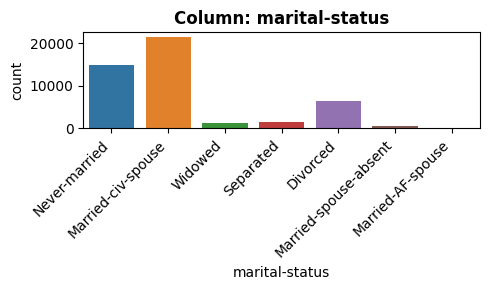

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 21439 times (46.61%)


In [22]:
# Testing function
fig, ax = explore_categorical(df_adult, "marital-status", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 46.61% of the feature.

4. What is the cardinality? Is it high?
  - There are 7 categories.No high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####occupation

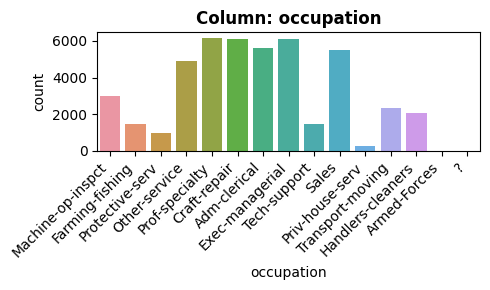

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6165 times (13.4%)


In [23]:
# Testing function
fig, ax = explore_categorical(df_adult, "occupation", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 46.61% of the feature.

4. What is the cardinality? Is it high?
  - There are 15 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####relationship

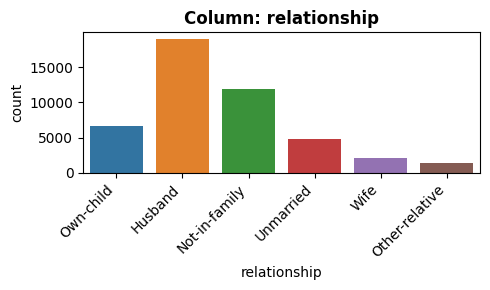

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 18992 times (41.29%)


In [24]:
# Testing function
fig, ax = explore_categorical(df_adult, "relationship", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 41.29% of the feature.

4. What is the cardinality? Is it high?
  - There are 6 categories.No high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####race

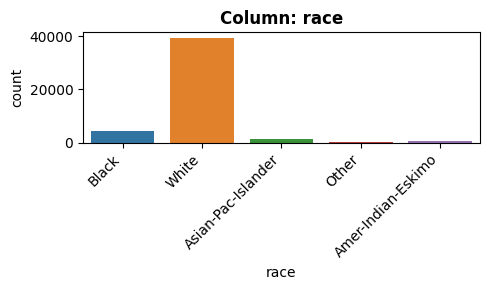

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 39407 times (85.68%)


In [25]:
# Testing function
fig, ax = explore_categorical(df_adult, "race", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 85.68% of the feature.

4. What is the cardinality? Is it high?
  - There are 5 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####gender

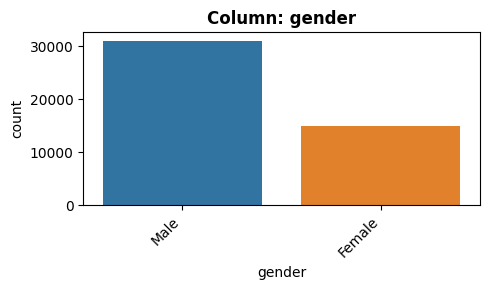

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 31088 times (67.59%)


In [26]:
# Testing function
fig, ax = explore_categorical(df_adult, "gender", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 67.59% of the feature.

4. What is the cardinality? Is it high?
  - There are 2 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

###Numeric

####age

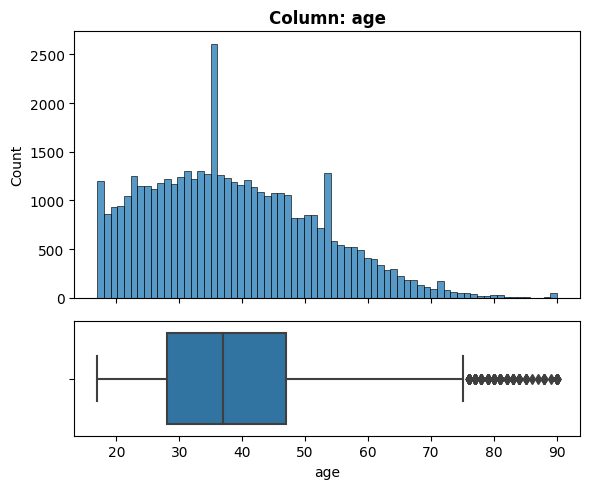

- NaN's Found: 0 (0.0%)
- Unique Values: 74
- Most common value: '36' occurs 1312 times (2.85%)


In [27]:
# Testing the function
explore_numeric(df_adult, "age");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


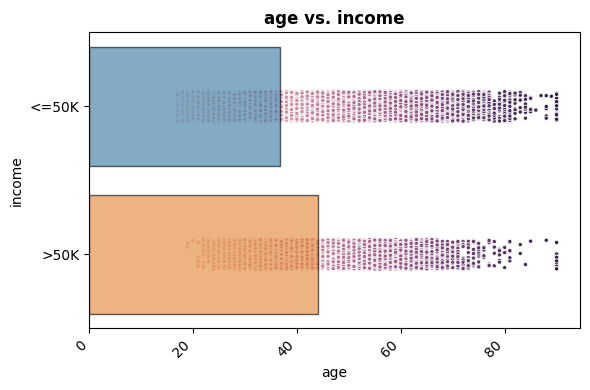

In [28]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'age','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###fnlwgt

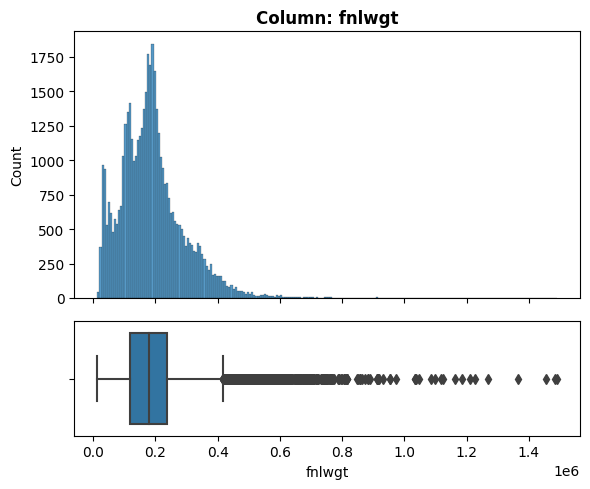

- NaN's Found: 0 (0.0%)
- Unique Values: 27039
- Most common value: '203488' occurs 21 times (0.05%)


In [29]:
# Testing the function
explore_numeric(df_adult, "fnlwgt");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


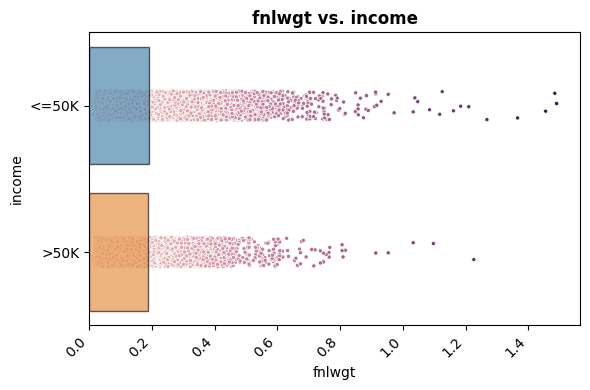

In [30]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'fnlwgt','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###educational-num

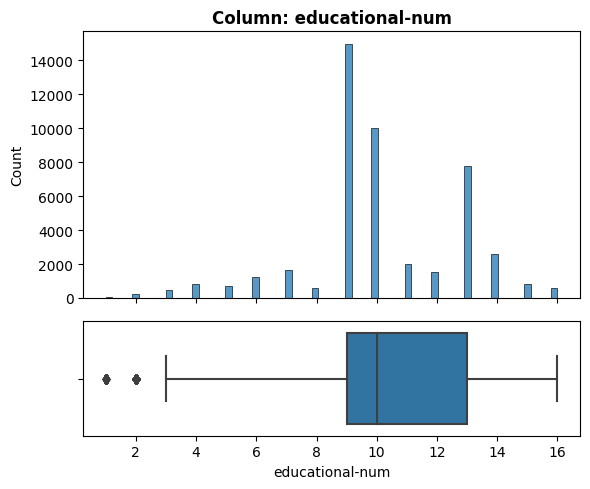

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 14960 times (32.53%)


In [31]:
# Testing the function
explore_numeric(df_adult, "educational-num");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


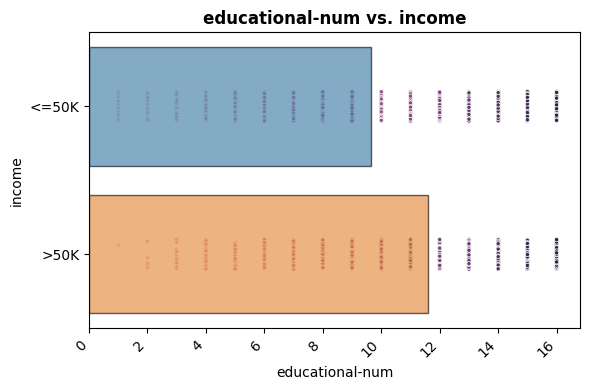

In [32]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'educational-num','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###capital-gain

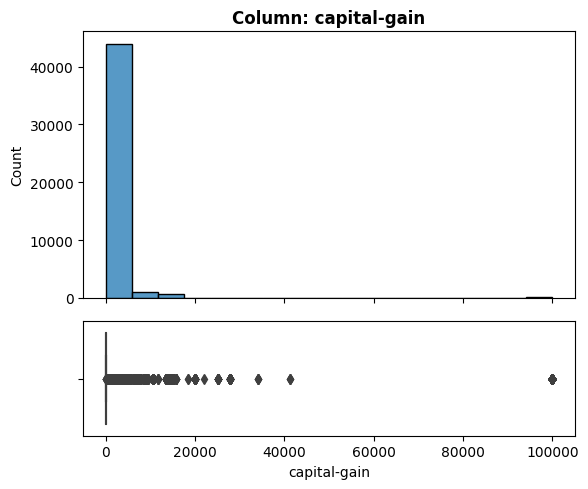

- NaN's Found: 0 (0.0%)
- Unique Values: 121
- Most common value: '0' occurs 42134 times (91.61%)


In [33]:
# Testing the function
explore_numeric(df_adult, "capital-gain");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


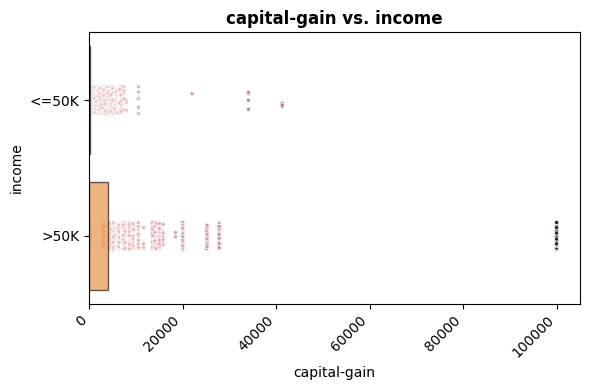

In [34]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'capital-gain','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###capital-loss

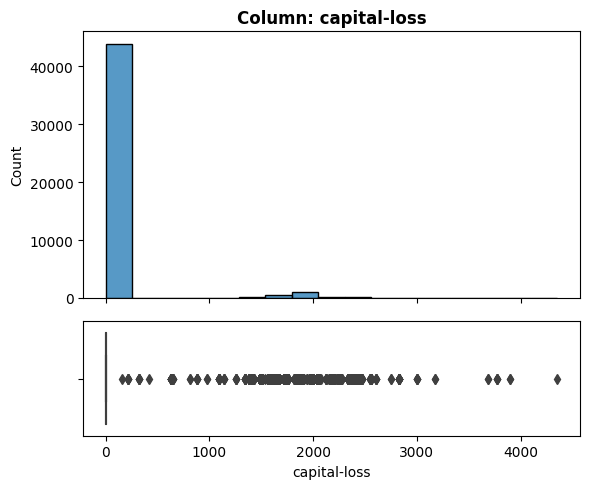

- NaN's Found: 0 (0.0%)
- Unique Values: 97
- Most common value: '0' occurs 43814 times (95.26%)


In [35]:
# Testing the function
explore_numeric(df_adult, "capital-loss");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


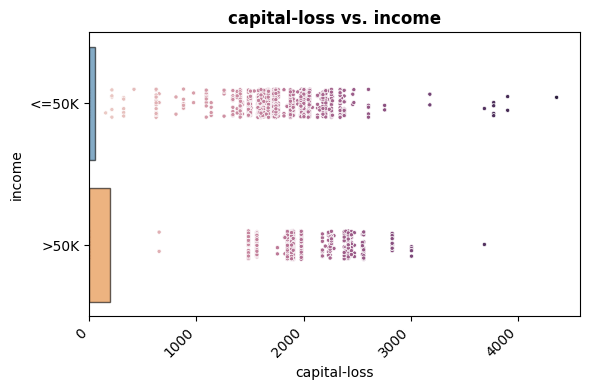

In [36]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'capital-loss','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###hours-per-week

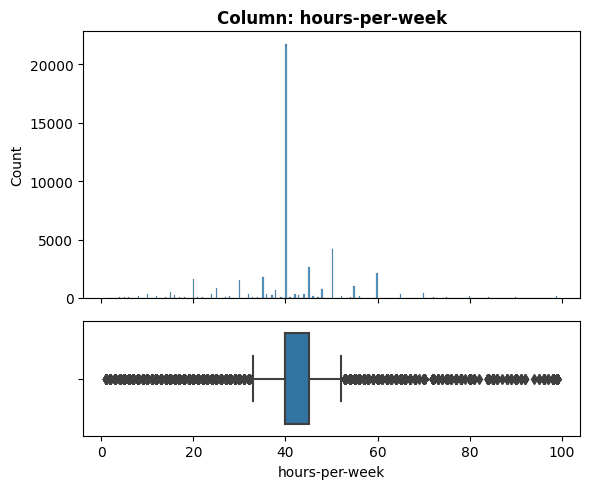

- NaN's Found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 21743 times (47.27%)


In [37]:
# Testing the function
explore_numeric(df_adult, "hours-per-week");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


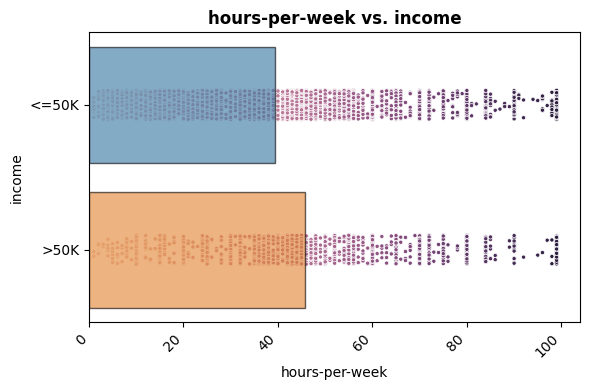

In [38]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'hours-per-week','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

####Produced univariate visuals for the target and all features.

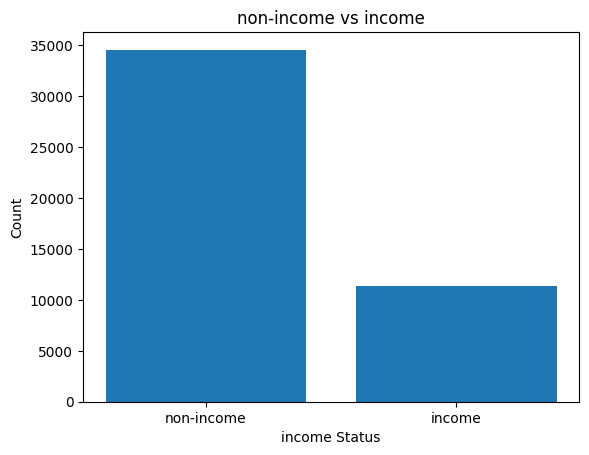

In [39]:
#Plot the counts for the number of adults who has income vs not having income.
fig, ax = plt.subplots()

survived_counts = df_adult['income'].value_counts()
plt.bar(['non-income', 'income'], survived_counts)
#plt.bar(['Died', 'Survived'], survived_counts)

# Set x-label, y-label, and title
plt.xlabel('income Status')
plt.ylabel('Count')
plt.title('non-income vs income')

# Display the plot
plt.show()

Text(0, 0.5, 'Number age group')

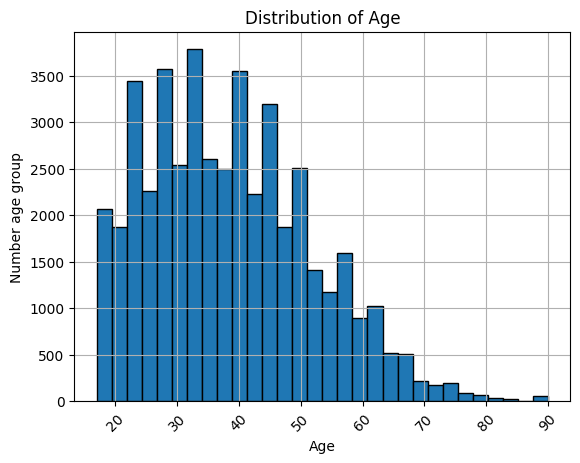

In [40]:
#Plot a histogram of the distribution of Age.
ax = df_adult['age'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Number age group')

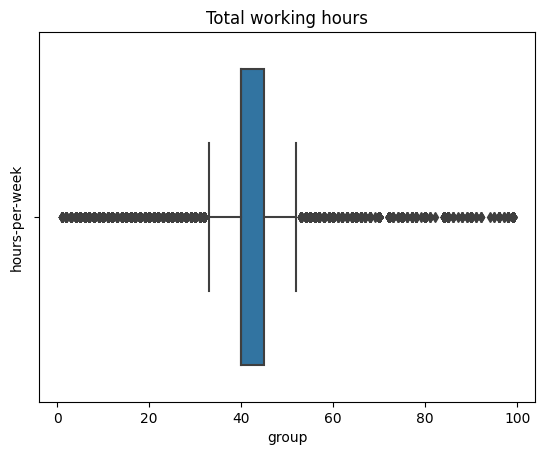

In [41]:
# Create the boxplot
ax = sns.boxplot(data=df_adult,x="hours-per-week")
ax.set_xlabel("group");
ax.set_ylabel("hours-per-week");
ax.set_title("Total working hours");

####histogram

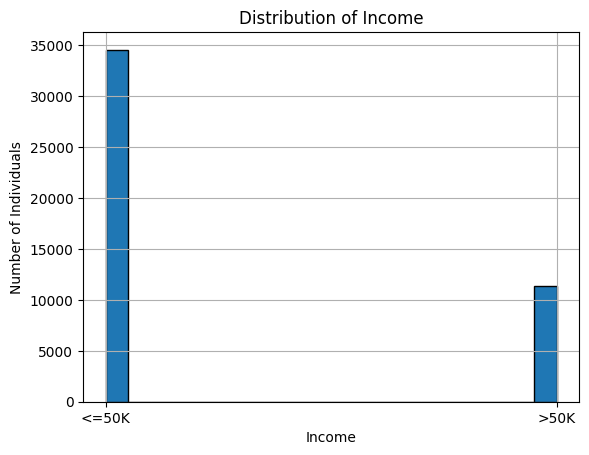

In [42]:
# Create the histogram
ax = df_adult['income'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Income')
ax.set_xlabel('Income')
ax.set_ylabel('Number of Individuals');

####boxplot

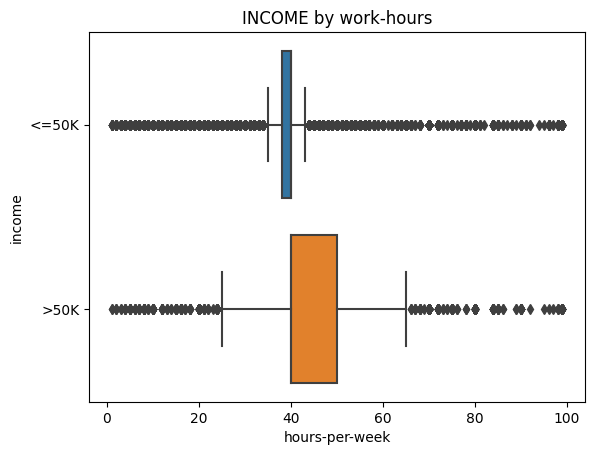

In [43]:
# Create the boxplot
ax = sns.boxplot(x = 'hours-per-week', y = 'income', data = df_adult)
ax.set_title('INCOME by work-hours');

####Plot a corrleation heatmap of all of the numeric columns

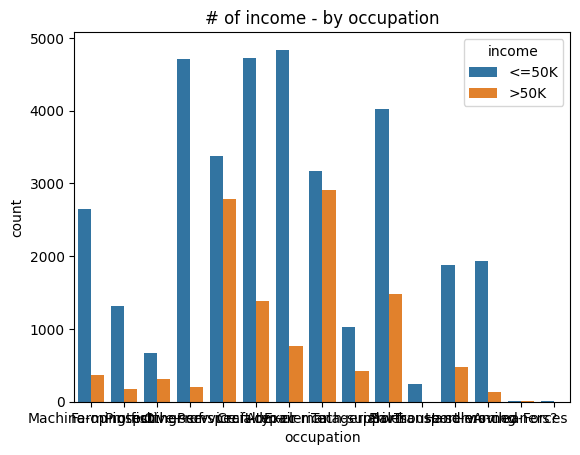

In [44]:
ax = sns.countplot(data=df_adult, hue='income', x='occupation');
ax.set(title='# of income - by occupation');

###Second choice: dataset 2

1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person? A business? An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

In [45]:
# Load the data set
fpath_wine = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/wines_SPA.csv"
df_wine = pd.read_csv(fpath_wine)

In [46]:
df_wine.info()
df_wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


### Source of data
- The data can be downloaded from [this link](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset)

###Brief description of data
* This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.
).

###What is the target?
* rating

###What does one row represent? (A person? A business? An event? A product?)
* A business

###Is this a classification or regression problem?
  - Based on the description , each row likely represents a specific type or bottle of red Spanish wine, and the dataset captures information about its attributes, popularity metrics, and quality metrics.

The dataset can be used for both classification and regression tasks but I'm choosing regression model to capture the fact very closer.

###How many features does the data have?
- total 11

###How many rows are in the dataset?
- 7500 entries

###What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Yes

###Identified and addressed missing values.

In [47]:
null_counts = df_wine.isna().sum()

* Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage.

In [48]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df_wine) * 100
null_percent

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64

In [49]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

,# Null,% Null
winery,0,0.00
wine,0,0.00
year,2,0.03
rating,0,0.00
num_reviews,0,0.00
country,0,0.00
region,0,0.00
price,0,0.00
type,545,7.27
body,1169,15.59


Of these columns, 3 seems to have primarily null values ("year","type","body" and "acidity").

In [50]:
## filtering for only columns with null values
null_report[ null_report['# Null']>0]

,# Null,% Null
year,2,0.03
type,545,7.27
body,1169,15.59
acidity,1169,15.59


#### Null Value Observations:
- Body and acidity have 13 percentage of null values (13.23% and 13.23%, respectively).
- type and year have less than 5% of null values (0.10% and 5.18% respectively)
- The presence of missing values in the "Age" and "BP" columns could impact your analysis.
- We can Imputer place holder for 'MISSING' for catogorical and mean/median fro numerical columns.

###Deleted duplicate rows.

In [51]:
#Explore Data
df_wine.duplicated().sum()

5452

* There are 5452 duplicated records in dataset

In [52]:
# drop duplicated record
df_wine = df_wine.drop_duplicates()

In [53]:
#again check duplicates dropped or not
df_wine.duplicated().sum()

0

* now, there are no duplicated rows

###Deleted unnecessary columns

In [54]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


* there is no data type missing

###Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [55]:
data_types = df_wine.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_wine[col].value_counts(dropna=False))
    print("\n\n")
    print(df_wine[col])

- winery:
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



0            Teso La Monja
1                   Artadi
2             Vega Sicilia
3             Vega Sicilia
4             Vega Sicilia
               ...        
2046           Mustiguillo
2047           Matarromera
2048              Sei Solo
2049    Vinedos de Paganos
6100     Remirez de Ganuza
Name: winery, Length: 2048, dtype: object
- wine:
Tinto                                                 56
Unico                                                 41
Valbuena 5o  

* There are no inconsistent categories

###Check for and address any impossible values in numeric columns.

In [56]:
stats =  df_wine.describe()
stats.loc[['mean','min','max']]

,rating,num_reviews,price,body,acidity
mean,4.401123,573.994629,135.242194,4.258863,2.921216
min,4.200000,25.000000,4.990000,2.000000,1.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


####Outliers

* There are no impossible numeric values
* there is no extreme outliers noted

In [76]:
df_wine.describe(include='object')

,winery,wine,year,country,region,type
count,2048,2048,2046,2048,2048,1942
unique,480,847,71,1,76,21
top,Vega Sicilia,Tinto,2016,Espana,Ribera del Duero,Ribera Del Duero Red
freq,97,56,243,2048,541,535


###Explore the data

In [57]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


####winery

<ipython-input-3-dbc3c6209243>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


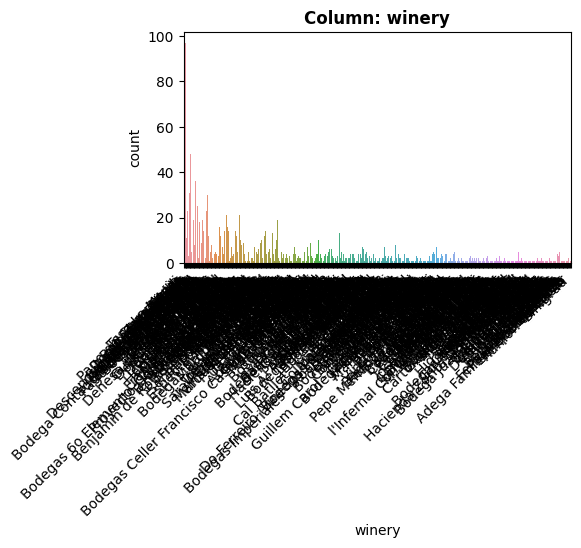

- NaN's Found: 0 (0.0%)
- Unique Values: 480
- Most common value: 'Vega Sicilia' occurs 97 times (4.74%)


In [58]:
# Testing function
fig, ax = explore_categorical(df_wine, "winery", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  0 null values (0.00%)
  - Nothing to Impute here


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 4.74% of the feature.

4. What is the cardinality? Is it high?
  - - There are 480 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####wine

<ipython-input-3-dbc3c6209243>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


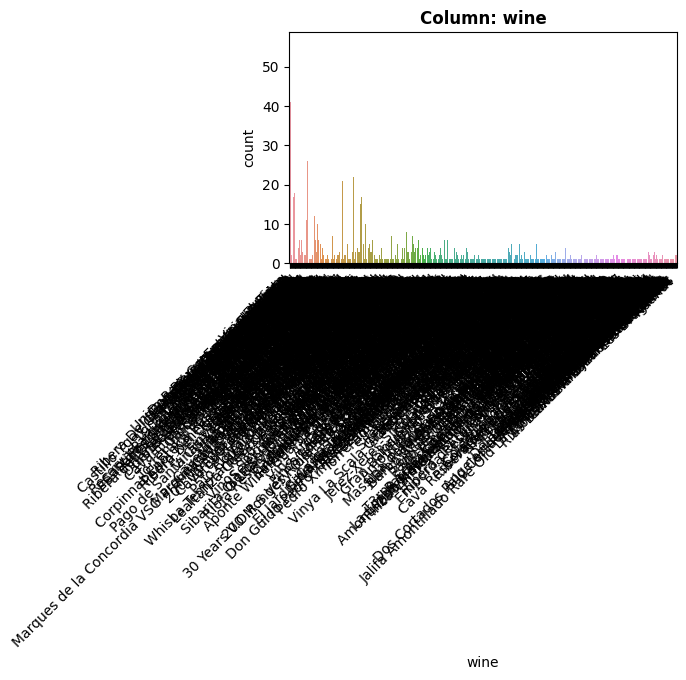

- NaN's Found: 0 (0.0%)
- Unique Values: 847
- Most common value: 'Tinto' occurs 56 times (2.73%)


In [59]:
fig, ax = explore_categorical(df_wine, "wine", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  0 null values (0.00%)
  - Nothing to Impute here


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 2.73% of the feature.

4. What is the cardinality? Is it high?
  - - There are 847 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####year

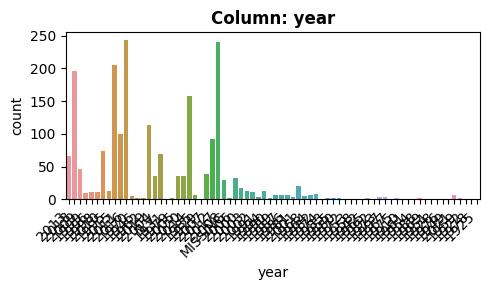

- NaN's Found: 2 (0.1%)
- Unique Values: 72
- Most common value: '2016' occurs 243 times (11.87%)


In [60]:
fig, ax = explore_categorical(df_wine, "year", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 null values (0.1%)
  - Impute with the 'MISSING'


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 11.87% of the feature.

4. What is the cardinality? Is it high?
  - - There are 72 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####country

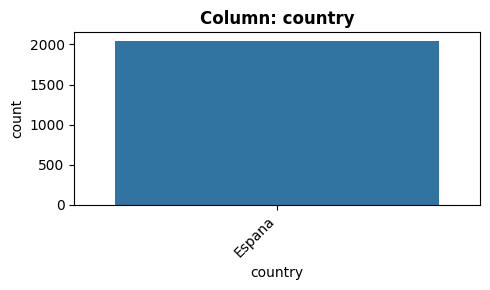

- NaN's Found: 0 (0.0%)
- Unique Values: 1
- Most common value: 'Espana' occurs 2048 times (100.0%)

- [!] Warning: 'country' is a constant or quasi-constant feature and should be dropped.


In [61]:
fig, ax = explore_categorical(df_wine, "country", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - No need to impute here


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 100.0% of the feature.

4. What is the cardinality? Is it high?
  - - There are 1 categories. low cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####region

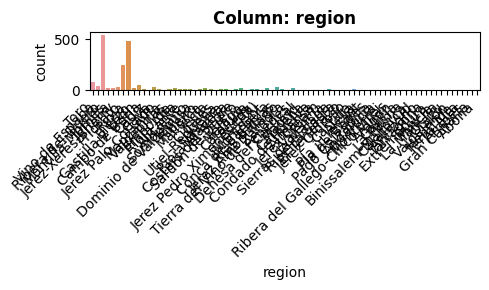

- NaN's Found: 0 (0.0%)
- Unique Values: 76
- Most common value: 'Ribera del Duero' occurs 541 times (26.42%)


In [62]:
fig, ax = explore_categorical(df_wine, "region", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0.0%)
  - No need to impute here


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 26.42% of the feature.

4. What is the cardinality? Is it high?
  - - There are 76 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####type

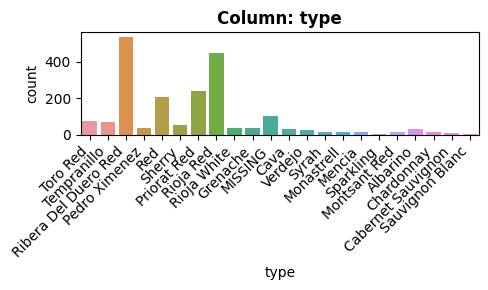

- NaN's Found: 106 (5.18%)
- Unique Values: 22
- Most common value: 'Ribera Del Duero Red' occurs 535 times (26.12%)


In [63]:
# Testing function
fig, ax = explore_categorical(df_wine, "type", figsize=(5,3))

**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  106 null values (5.18%)
  - Impute with the category shown in the data dictionary (NA)


3. Is the feature constant or quasi-constant?
  - - No, the most common category makes up only 26.12% of the feature.

4. What is the cardinality? Is it high?
  - - There are 22 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No


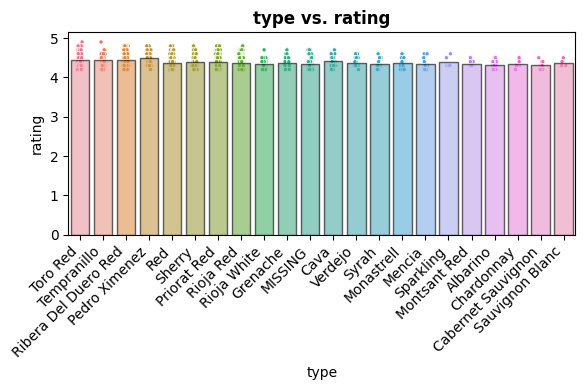

In [64]:
# Testing function
fig, ax = plot_categorical_vs_target(df_wine, "type",'rating')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, the type of the wine would change the rating, which may increase/decrease based on its type(wine).
  - Does this feature appear to be a predictor of the target?
    - Yes.

####rating

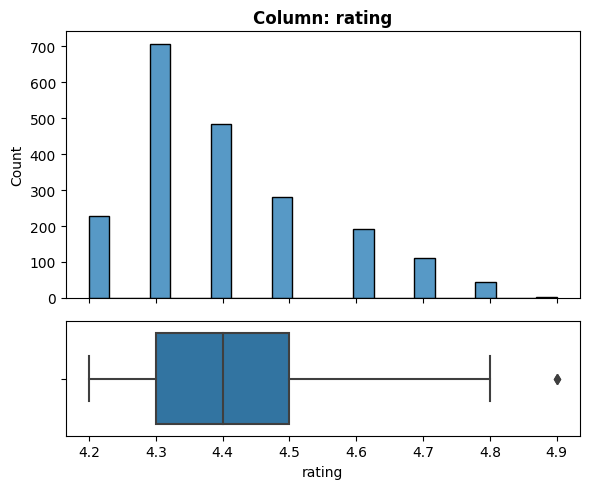

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '4.3' occurs 706 times (34.47%)


In [65]:
# Testing the function
explore_numeric(df_wine, "rating");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nul values (0.0%)
  - No, need to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, since it is our target!

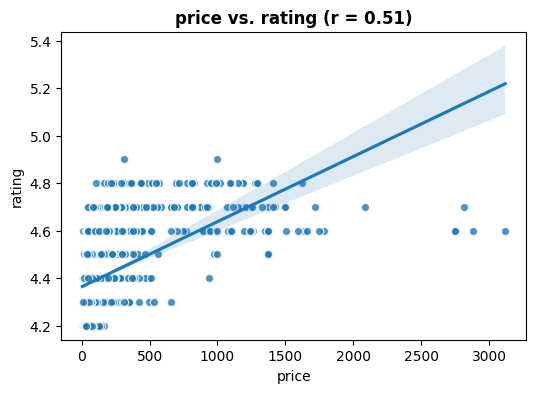

In [66]:
fig, ax = plot_numeric_vs_target(df_wine, 'price','rating')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

####price

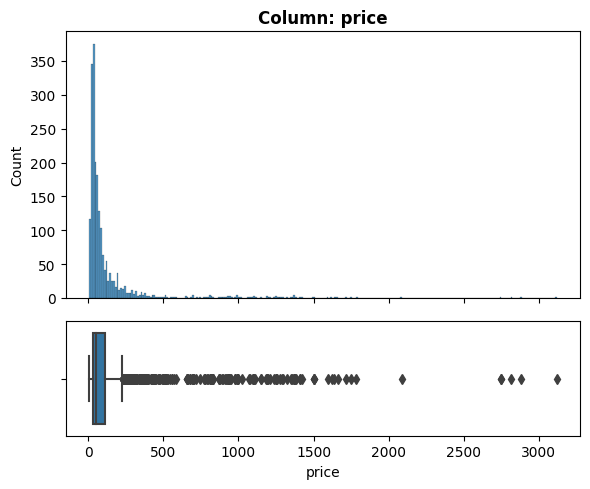

- NaN's Found: 0 (0.0%)
- Unique Values: 1292
- Most common value: '75.0' occurs 16 times (0.78%)


In [67]:
# Testing the function
explore_numeric(df_wine, "price");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 nul values (0.0%)
  - No, need to impute

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####body

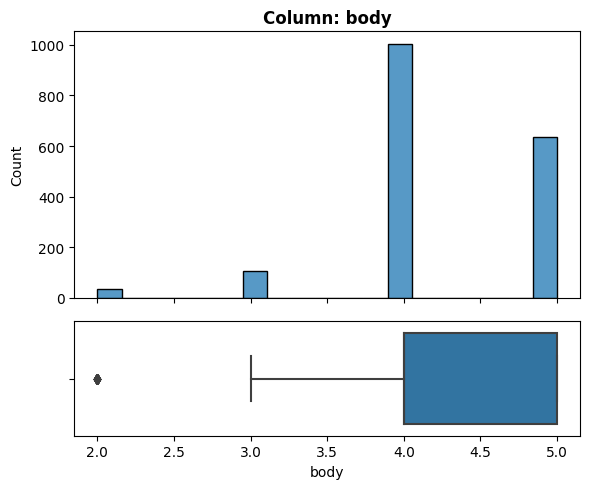

- NaN's Found: 271 (13.23%)
- Unique Values: 4
- Most common value: '4.0' occurs 1003 times (48.97%)


In [68]:
# Testing the function
explore_numeric(df_wine, "body");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 271 nul values (13.23%)
  - impute with mean or median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####acidity

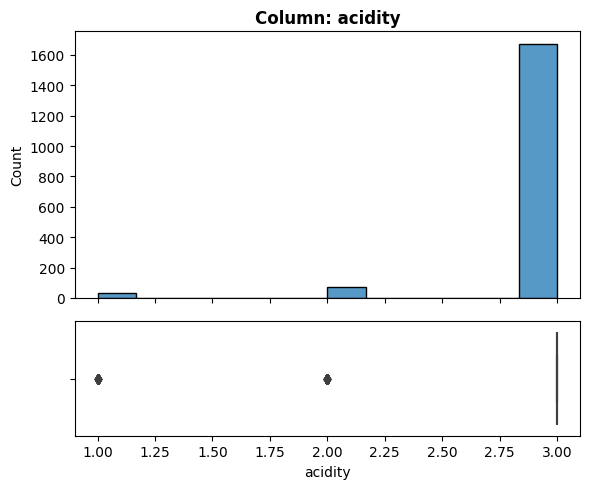

- NaN's Found: 271 (13.23%)
- Unique Values: 3
- Most common value: '3.0' occurs 1672 times (81.64%)


In [69]:
# Testing the function
explore_numeric(df_wine, "acidity");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 271 nul values (13.23%)
  - impute with mean or median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

####Produced univariate visuals for the target and all features.

Text(0, 0.5, 'Total')

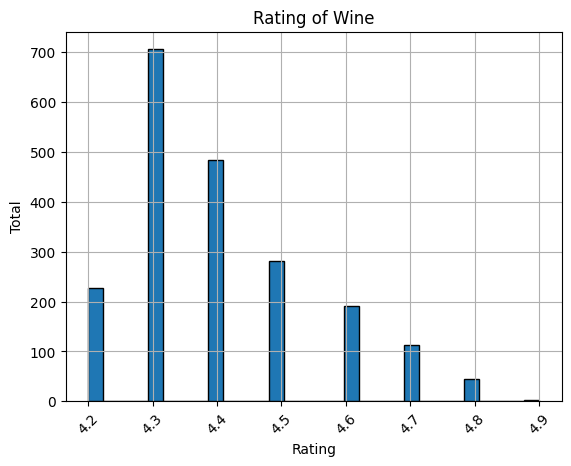

In [70]:
#Plot a histogram of the distribution of Age.
ax = df_wine['rating'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Rating of Wine')
ax.set_xlabel('Rating')
ax.set_ylabel('Total')

####histogram

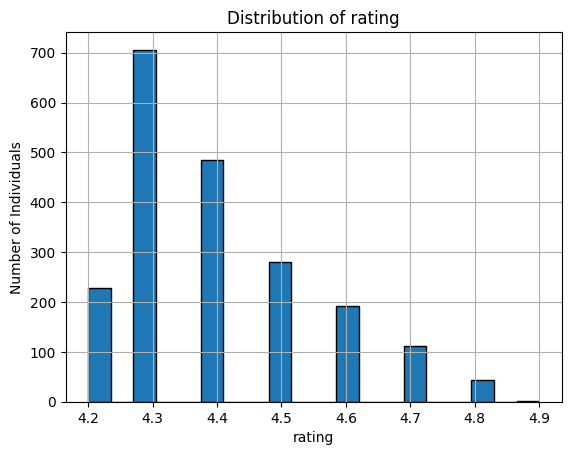

In [71]:
# Create the histogram
ax = df_wine['rating'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of rating')
ax.set_xlabel('rating')
ax.set_ylabel('Number of Individuals');

####boxplot

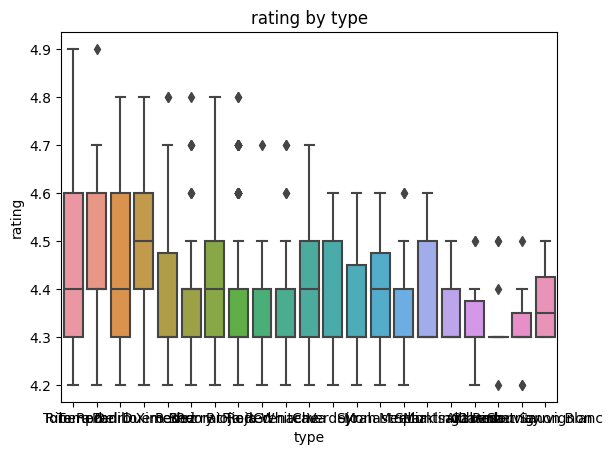

In [72]:
# Create the boxplot
ax = sns.boxplot(x = 'type', y = 'rating', data = df_wine)
ax.set_title('rating by type');

####Plot a corrleation heatmap of all of the numeric columns.

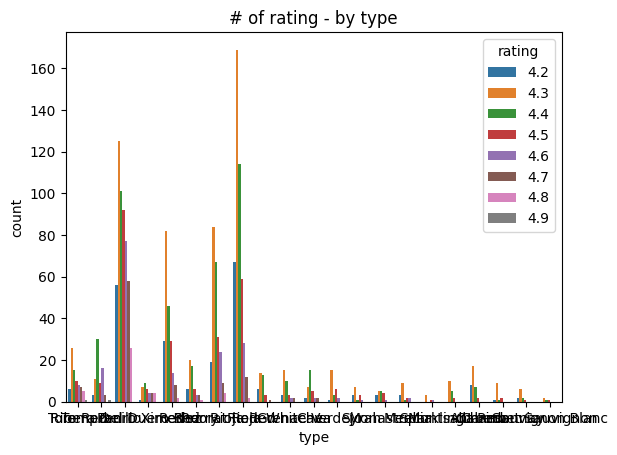

In [73]:
ax = sns.countplot(data=df_wine, hue='rating', x='type');
ax.set(title='# of rating - by type');